In [1]:
!pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

file_path = '/Users/anirudhravipudi/Desktop/AI/Practice/groceries.csv'

df = pd.read_csv(file_path, header=None)
transactions = df[0].apply(lambda x: x.split(','))

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

print("📌 Top 10 Association Rules by Lift:\n")
print(rules.sort_values(by='lift', ascending=False).head(10))

frequent_itemsets.to_csv('frequent_itemsets.csv', index=False)
rules.to_csv('association_rules.csv', index=False)

ParserError: Error tokenizing data. C error: Expected 4 fields in line 6, saw 5


In [5]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load CSV with unknown number of columns
file_path = '/Users/anirudhravipudi/Desktop/AI/Practice/groceries.csv'

# Try reading without assuming a fixed number of columns
df = pd.read_csv(file_path, header=None)

# Convert rows to list of items, dropping NaNs
transactions = df.apply(lambda row: row.dropna().tolist(), axis=1)

# TransactionEncoder to one-hot encode
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Show Top 10 Rules
print("📌 Top 10 Association Rules by Lift:\n")
print(rules.sort_values(by='lift', ascending=False).head(10))

ParserError: Error tokenizing data. C error: Expected 4 fields in line 6, saw 5


In [7]:
with open('/Users/anirudhravipudi/Desktop/AI/Practice/groceries.csv', 'r') as file:
    for i in range(10):
        print(file.readline())

citrus fruit,semi-finished bread,margarine,ready soups

tropical fruit,yogurt,coffee

whole milk

pip fruit,yogurt,cream cheese,meat spreads

other vegetables,whole milk,condensed milk,long life bakery product

whole milk,butter,yogurt,rice,abrasive cleaner

rolls/buns

other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer)

potted plants

whole milk,cereals



In [11]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# 📁 Load the CSV properly
file_path = '/Users/anirudhravipudi/Desktop/AI/Practice/groceries.csv'

# Read each line as a single transaction string, then split into list of items
with open(file_path, 'r') as f:
    transactions = [line.strip().split(',') for line in f]

# 🧼 One-hot encode the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# 🔍 Apply Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# 📏 Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# 📊 Show Top 10 Rules
print("📌 Top 10 Association Rules by Lift:\n")
print(rules.sort_values(by='lift', ascending=False).head(10))

📌 Top 10 Association Rules by Lift:

                            antecedents                         consequents  \
440                              (curd)                (yogurt, whole milk)   
437                (yogurt, whole milk)                              (curd)   
419    (citrus fruit, other vegetables)                   (root vegetables)   
422                   (root vegetables)    (citrus fruit, other vegetables)   
539          (yogurt, other vegetables)                (whipped/sour cream)   
542                (whipped/sour cream)          (yogurt, other vegetables)   
494                   (root vegetables)  (tropical fruit, other vegetables)   
491  (tropical fruit, other vegetables)                   (root vegetables)   
4                                (beef)                   (root vegetables)   
5                     (root vegetables)                              (beef)   

     antecedent support  consequent support   support  confidence      lift  \
440           

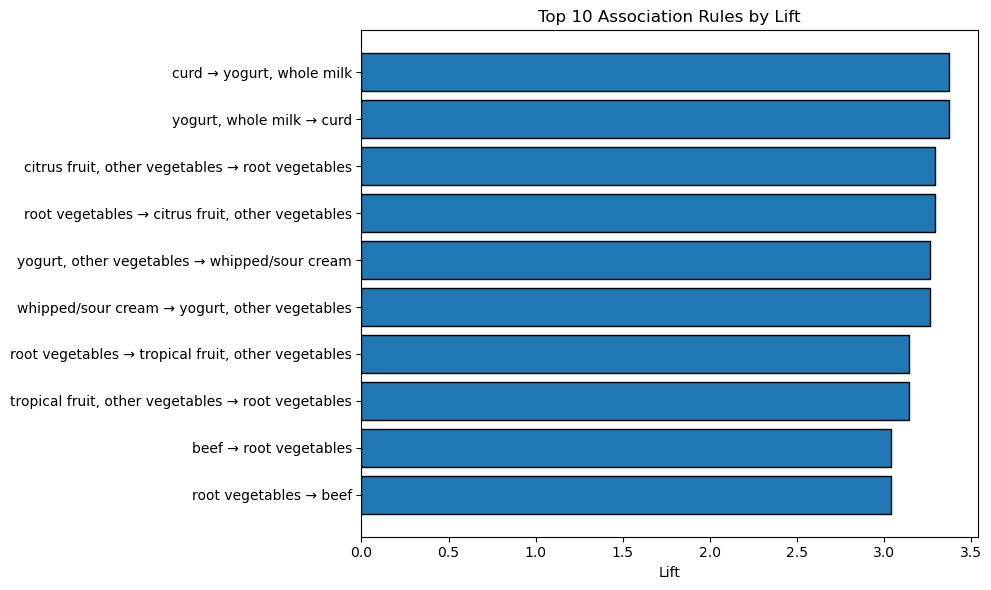

In [13]:
import matplotlib.pyplot as plt

# Sort rules by lift and pick top 10
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

# Plot bar chart of lift
plt.figure(figsize=(10, 6))
plt.barh(
    [f"{', '.join(list(a))} → {', '.join(list(c))}" for a, c in zip(top_rules['antecedents'], top_rules['consequents'])],
    top_rules['lift'],
    edgecolor='black'
)
plt.xlabel("Lift")
plt.title("Top 10 Association Rules by Lift")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd

df = pd.read_csv('/Users/anirudhravipudi/Desktop/AI/Practice/Groceries_dataset.csv')
print(df.head())

   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


In [17]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

file_path = '/Users/anirudhravipudi/Desktop/AI/Practice/Groceries_dataset.csv'
df = pd.read_csv(file_path)

transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).tolist()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

print("📌 Top 10 Association Rules by Lift:\n")
print(rules.sort_values(by='lift', ascending=False).head(10))

📌 Top 10 Association Rules by Lift:

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


In [19]:
print(frequent_itemsets.sort_values(by='support', ascending=False).head(10))

     support            itemsets
0   0.157923        (whole milk)
15  0.122101  (other vegetables)
11  0.110005        (rolls/buns)
8   0.097106              (soda)
1   0.085879            (yogurt)
22  0.069572   (root vegetables)
18  0.067767    (tropical fruit)
29  0.060683     (bottled water)
2   0.060349           (sausage)
43  0.053131      (citrus fruit)


In [21]:
# Try with lower min_threshold and a different metric
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)

# Show Top 10
print("📌 Top 10 Rules by Confidence:\n")
print(rules.sort_values(by='confidence', ascending=False).head(10))

📌 Top 10 Rules by Confidence:

          antecedents   consequents  antecedent support  consequent support  \
0            (yogurt)  (whole milk)            0.085879            0.157923   
2        (rolls/buns)  (whole milk)            0.110005            0.157923   
3  (other vegetables)  (whole milk)            0.122101            0.157923   
1              (soda)  (whole milk)            0.097106            0.157923   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.011161    0.129961  0.822940               1.0 -0.002401    0.967861   
2  0.013968    0.126974  0.804028               1.0 -0.003404    0.964550   
3  0.014837    0.121511  0.769430               1.0 -0.004446    0.958551   
1  0.011629    0.119752  0.758296               1.0 -0.003707    0.956636   

   zhangs_metric   jaccard  certainty  kulczynski  
0      -0.190525  0.047975  -0.033206    0.100317  
2      -0.214986  0.055000  -0.036752    0.107711  
3      -0.254477  0.055948  -0.

In [23]:
frequent_itemsets = fpgrowth(df_encoded, min_support=0.005, use_colnames=True)

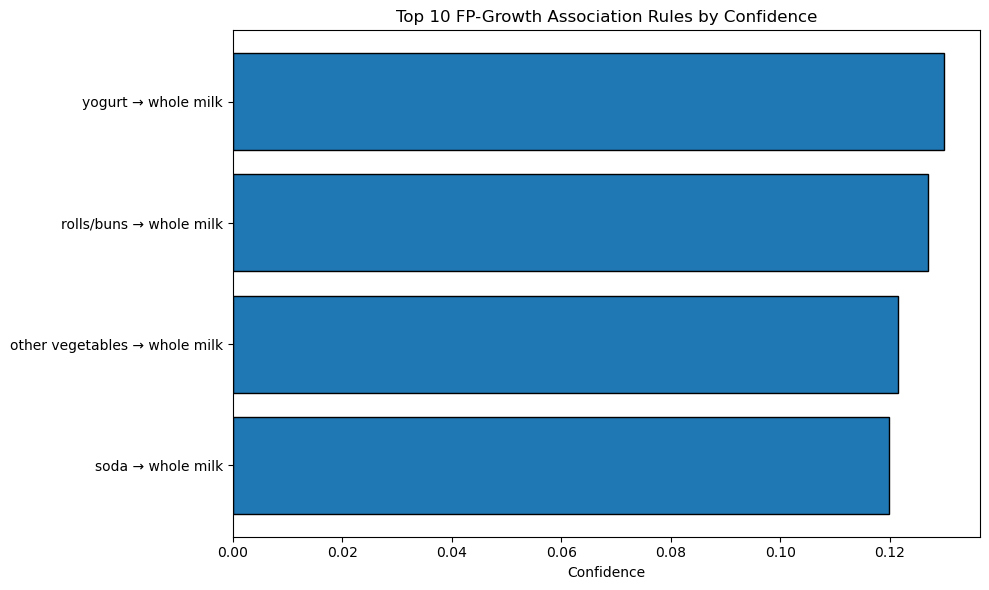

In [25]:
import matplotlib.pyplot as plt

# Sort and select top 10 rules by confidence
top_rules = rules.sort_values(by='confidence', ascending=False).head(10)

# Format rule labels
labels = [f"{', '.join(a)} → {', '.join(c)}" for a, c in zip(top_rules['antecedents'], top_rules['consequents'])]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(labels, top_rules['confidence'], edgecolor='black')
plt.xlabel("Confidence")
plt.title("Top 10 FP-Growth Association Rules by Confidence")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()